# Raport projektowy – Ocena jakości wina czerwonego Vinho Verde

### 1. Przedstawienie problemu.
Celem projektu było przygotowanie modelu uczenia maszynowego, który będzie w stanie z zadawalającą skutecznością klasyfikować wina czerwone gatunku Vinho Verde z północy Portugalii do kategorii jakościowych (od 1 do 10) na podstawie ich właściwości chemicznych.

### 2. Dane.
W zestawie danych wejściowych znalazło się 1599 obserwacji posiadających 11 zmiennych wejściowych i jedną zmienną wyjściową.

Lista zmiennych wejściowych:
  1. Kwasowość stała (g/L)
  2. Kwasowość lotna (g/L)
  3. Zawartość kwasu cytrynowego (g/L)
  4. Zawartość cukru resztkowego (g/L)
  5. Zawartość chlorków (g/L)
  6. Zawartość wolnego dwutlenku siarki (mg/L)
  7. Zawartość całkowita dwutlenku siarki (mg/L)
  8. Gęstość (g/cm3)
  9. pH (wartości od 0 do 14)
  10. Zawartość siarczanów (g/L)
  11. Zawartość alkoholu (%)
  12. Jakość (ocena od 0 do 10).

Zmienna wyjściowa:
  1.	Jakość (wartości od 1 do 10)

Link do danych: [Dane](https://github.com/UEPP40/PUM/blob/c1ab27e52bc82cc151bb217b27bd25dfd057d9e8/winequality-red.csv)

Rozkład zmiennych został przedstawiony na poniższych histogramach:

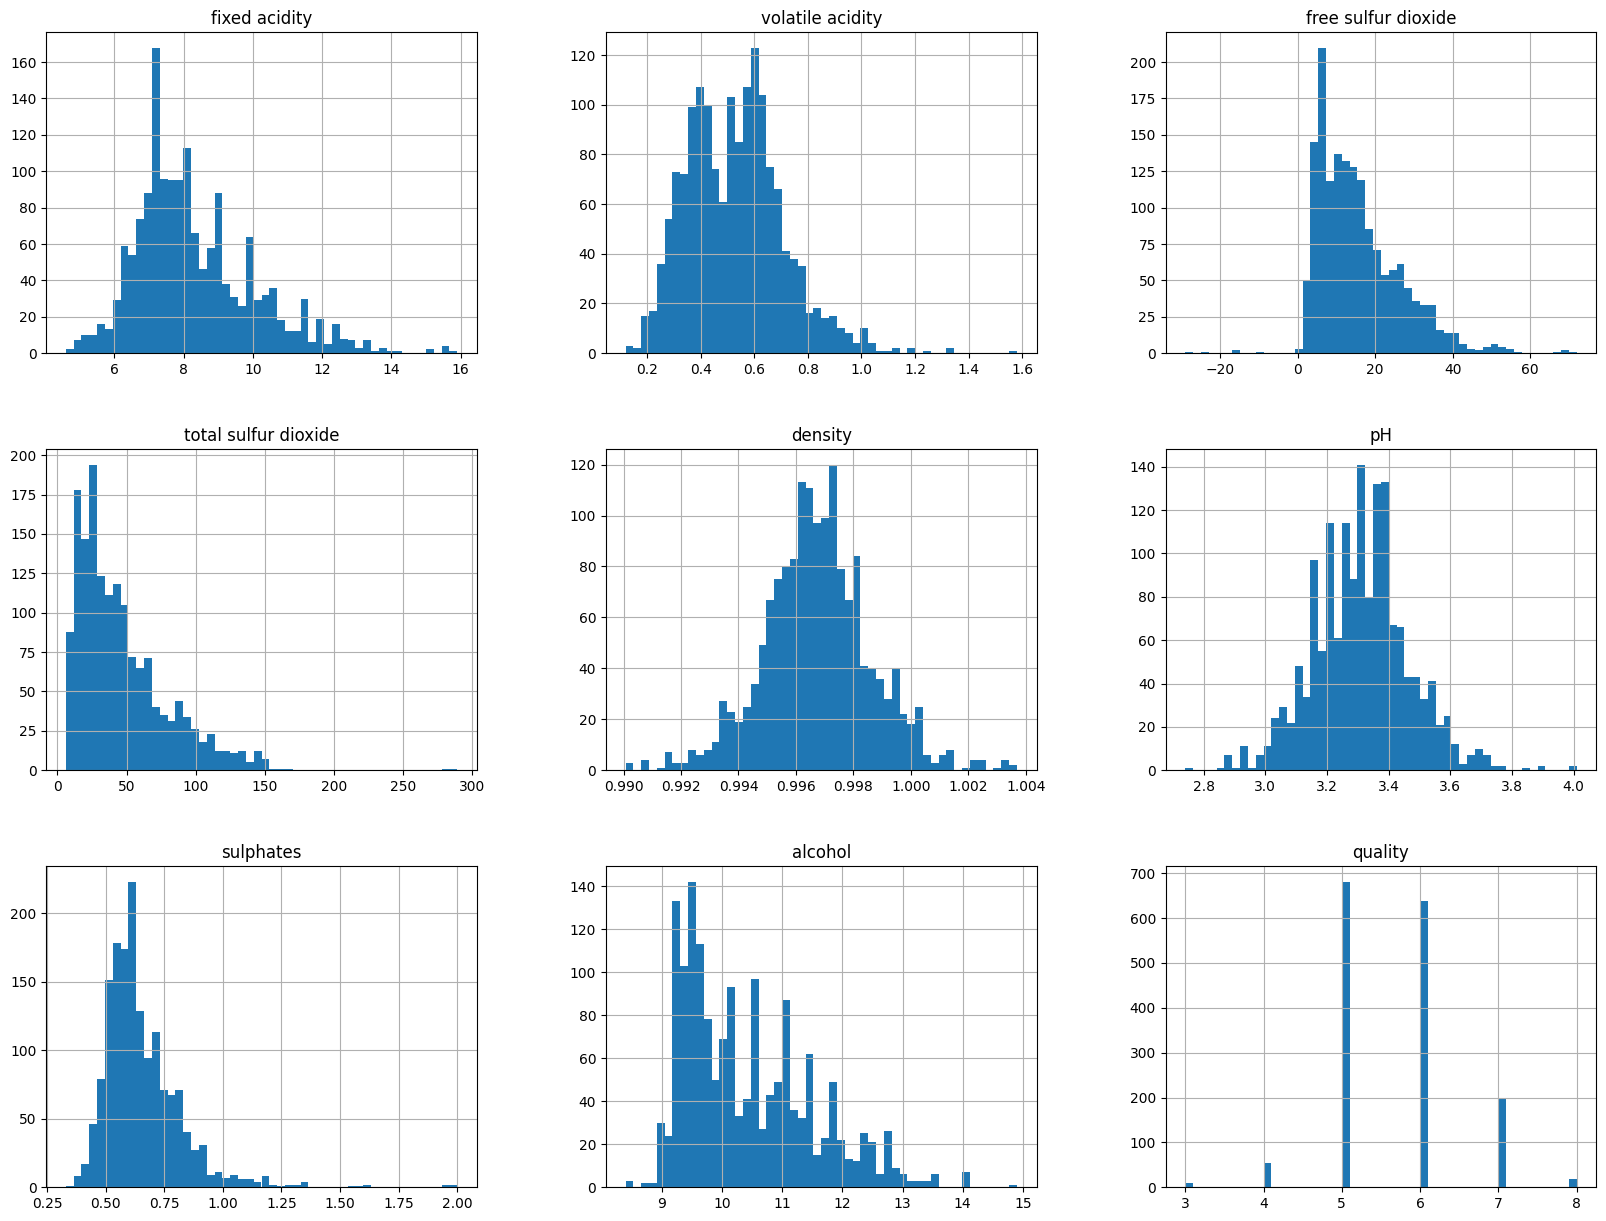

In [1]:
import raport_functions

data = raport_functions.get_starting_data()

raport_functions.display_histogram(data)

Podstawwowym problemem napotkanym w danych była duża rozbieżnośc pod względem ilość rekordów należących do poszczególnych klas jakościowych. Klasy 1, 2, 9 i 10 nie posiadały żadnych rekordów, a klasy 3, 4 i 8 posiadały ich niewiele. Zbiór danych był zdecydowanie zdominowany przez klasy 5, 6 i 7.

Podstawowe informacje o zbiorze danych:

In [2]:
raport_functions.display_info_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   object 
 3   residual sugar        1599 non-null   object 
 4   chlorides             1599 non-null   object 
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1595 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 150.0+ KB
None


Następnie dane zostały poddane procesowi pre-processingu. Wykonano następujące kroki:
1. Pozbyto się zbędnych znaków z wartości danych wejściowych.
2. Przekonwertowano typ danych dla wszystkich kolumn na numeryczny.
3. Odrzucono wszystkie rekordy posiadające puste wartości w którejkolwiek z kolumn.
4. Odrzucono wszystkie rekordy z wartościami skrajnymi w którejkolwiek z kolumn.

W wyniku czego w zbiorze danych pozostały 1503 rekordy.

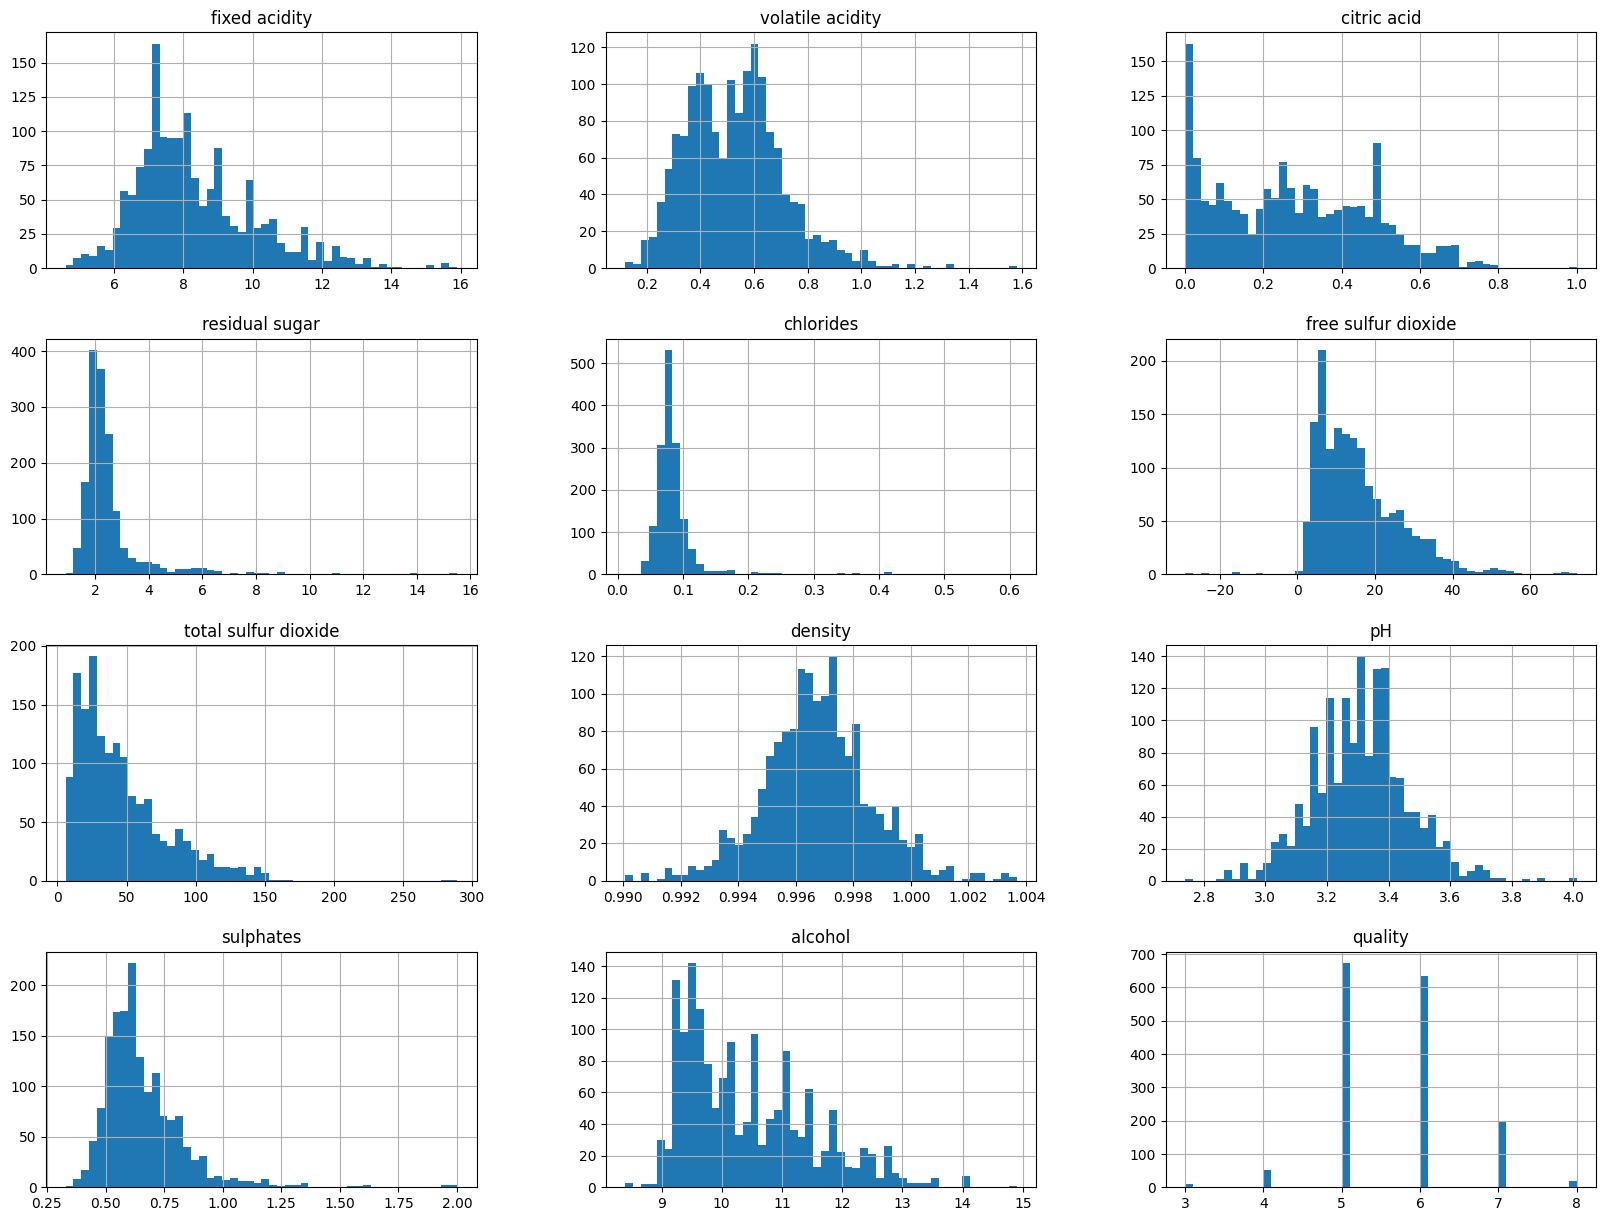

<class 'pandas.core.frame.DataFrame'>
Index: 1588 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1588 non-null   float64
 1   volatile acidity      1588 non-null   float64
 2   citric acid           1588 non-null   float64
 3   residual sugar        1588 non-null   float64
 4   chlorides             1588 non-null   float64
 5   free sulfur dioxide   1588 non-null   float64
 6   total sulfur dioxide  1588 non-null   float64
 7   density               1588 non-null   float64
 8   pH                    1588 non-null   float64
 9   sulphates             1588 non-null   float64
 10  alcohol               1588 non-null   float64
 11  quality               1588 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.3 KB
None


In [3]:
raport_functions.modify_data_initial(data)
raport_functions.display_histogram(data)
raport_functions.display_info_data(data)

Odrzucono także cechy o niskiej relewancji statystycznej. Za pułap, dla którego cecha została uznawana za istotną statystycznie, przyjęto korelację ze zmienną wynikową o wartości większej 0.1.

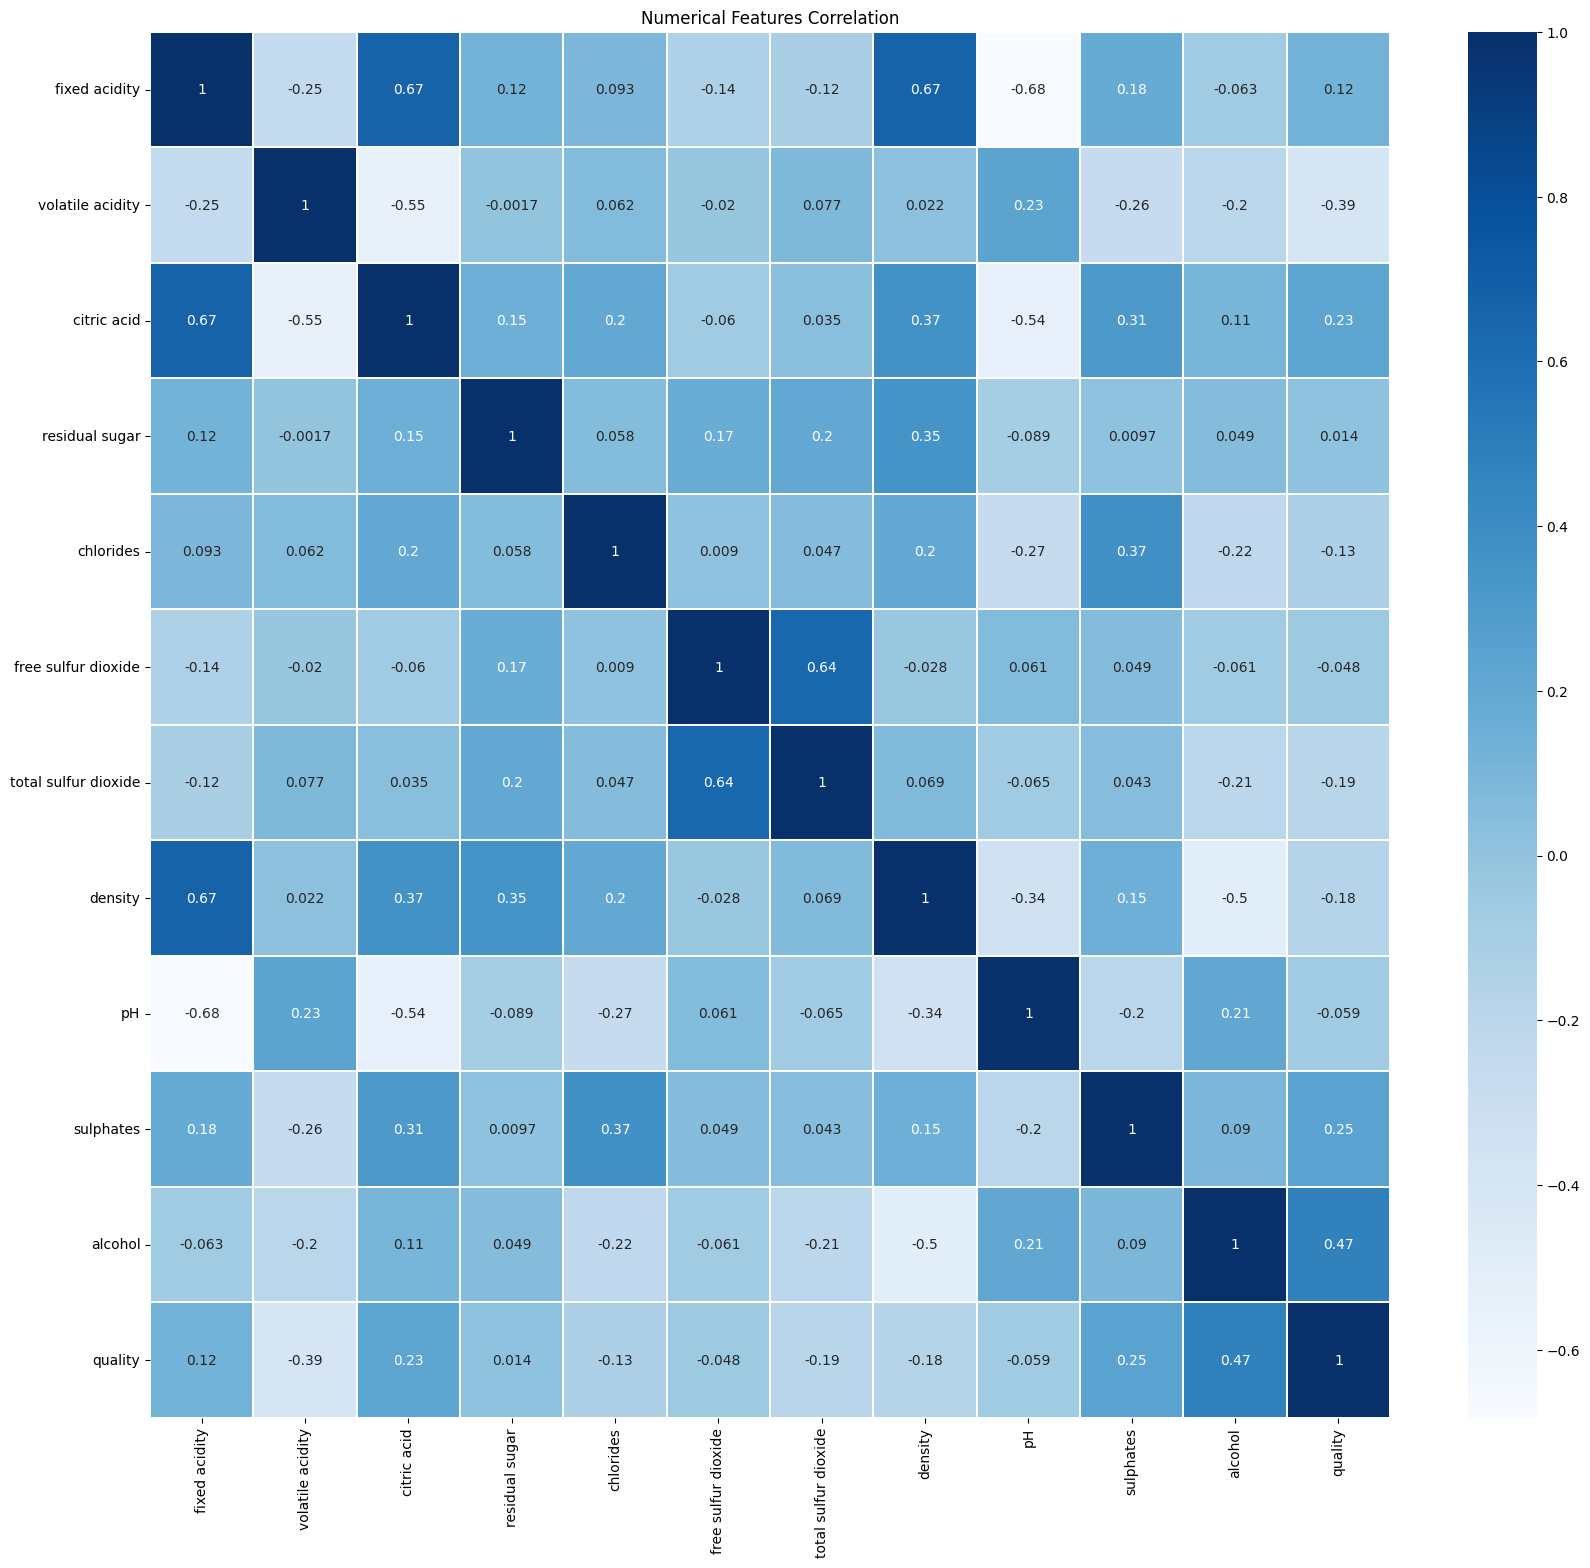

In [4]:
raport_functions.corr_matrix(data)

Cechy które pozostały w zbiorze danych to:
  1. Kwasowość stała (g/L).
  2. Zawartość kwasu cytrynowego (g/L).
  3. Zawartość chlorków (g/L).
  4. Zawartość całkowita dwutlenku siarki (mg/L).
  5. Gęstość (g/cm3).
  6. Zawartość siarczanów (g/L).
  7. Zawartość alkoholu (%).

Wreszcie, wartości kolumn z danymi wejściowymi przeskalowano przy pomocy MinMaxScalera, a zbiór danych podzielono na treningowy i testowy w proporcji 7:3, co pozostawiło nas z 1052 rekordami z zbiorze treningowym i 451 w zbiorze testowym.

### 2. Model 1 (benchmark) - Naive Bayes Classifier

Cechy modelu:
- Łatwy do implementacji i interpretacji
- Skalowalny
- Jest w stanie uchwycić złożone zależności
- Podatny na bycie kierowanym przez klasy dominujące
